## Problem Statement:
🎉🎉 Attention all student data whizzes! We are beyond excited to kick off the "Data Science Student Championship 2023". This year's challenge? A real head-turner: Predicting the 'total_fare' for taxi rides! 🚖

 

As a student, you've undoubtedly hailed a ride when you're late for class or heading out for a late-night study session. Ever wondered how the total cost of your ride is determined? Well, it's time to switch gears from passenger to predictor. In this thrilling hackathon, you'll put your data science skills to the ultimate test by predicting the total fare of a ride-hailing trip. 🎯

 

This championship is designed not just to put your skills under the microscope, but to refine them, strengthen them, and prepare you for real-world problem-solving scenarios. And that's not all! You'll be delving into a fundamental issue in the world of transportation economics.

 
## Meta Data:
* ⏱️ 'trip_duration': How long did the journey last?[in Seconds]
* 🛣️ 'distance_traveled': How far did the taxi travel?[in Km]
* 🧑‍🤝‍🧑 'num_of_passengers': How many passengers were in the taxi?
* 💵 'fare': What's the base fare for the journey?[In INR]
* 💲 'tip': How much did the driver receive in tips?[In INR]
* 🎀 'miscellaneous_fees': Were there any additional charges during the trip?e.g. tolls, convenience fees, GST etc.[In INR]
* 💰 'total_fare': The grand total for the ride (this is your prediction target!).[In INR]
* ⚡ 'surge_applied': Was there a surge pricing applied? Yes or no?

In [1]:
#Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Import the data:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [6]:
#Check for shape of the data
train.shape, test.shape

((209673, 8), (89861, 8))

In [7]:
#Preview the datasets:
train.head()

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
0,748.0,2.75,1.0,75.00,24,6.300,105.300,0
1,1187.0,3.43,1.0,105.00,24,13.200,142.200,0
2,730.0,3.12,1.0,71.25,0,26.625,97.875,1
3,671.0,5.63,3.0,90.00,0,9.750,99.750,0
4,329.0,2.09,1.0,45.00,12,13.200,70.200,0


In [8]:
test.head()

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
0,1076.0,4.18,1.0,0,0,13.500,0,0
1,429.0,1.48,4.0,0,0,13.500,0,0
2,856.0,4.15,1.0,0,24,6.000,0,0
3,622.0,3.22,1.0,0,15,5.625,0,0
4,507.0,3.98,1.0,0,0,2.250,0,0


**Inference:**
#Relation: 
fare + tip + miscellaneous_fees = total_fare

### Exploratory Data Analysis:
* Univariate Analysis
* Bivariate Analysis
* Missing Values
* Outlier Identification and removal
* Feature Engineering
* Statistical Analysis
* Scaling/Transformation

At this stage, the data is ready for Modelling

### Model Building:
* Base models: Linear regression, Decision Tree, Random Forest, Gradient Boosting Machines, Xtreme Gradient Boosting, CatBoostRegressor, LightGBM.

--

### ML Ops: Deployment of the Machine Learning Model
Machine Learning operations are generally the segment in ML that is used to deploy these applications in the real world. For example: you are building a taxi fare prediction model. You will take this inference and calculations done to put this in real world through mobile-app enabling customers finding the fare price with transparency using A.I.

* Some of the most popular platforms for deployment of ML Models: Streamlit, Heroku, (Django and Flask) apart from Cloud which is AWS or Azure etc.

**NOTE and Area of Brainstorming -- Connecting SQL with Python**

In [11]:
#Combine the train & test set:

combined=pd.concat([train,test],ignore_index=True)

In [12]:
combined.shape

(299534, 8)

In [13]:
combined.head()

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
0,748.0,2.75,1.0,75.00,24,6.300,105.300,0
1,1187.0,3.43,1.0,105.00,24,13.200,142.200,0
2,730.0,3.12,1.0,71.25,0,26.625,97.875,1
3,671.0,5.63,3.0,90.00,0,9.750,99.750,0
4,329.0,2.09,1.0,45.00,12,13.200,70.200,0


### 1. Exploratory Data Analysis:

In [14]:
combined.select_dtypes(include=np.number).columns

Index(['trip_duration', 'distance_traveled', 'num_of_passengers', 'fare',
       'tip', 'miscellaneous_fees', 'total_fare', 'surge_applied'],
      dtype='object')

In [15]:
num_vars=['trip_duration', 'distance_traveled', 'fare',
       'tip', 'miscellaneous_fees', 'total_fare']
cat_vars=['num_of_passengers','surge_applied']

##### Univariate Analysis:

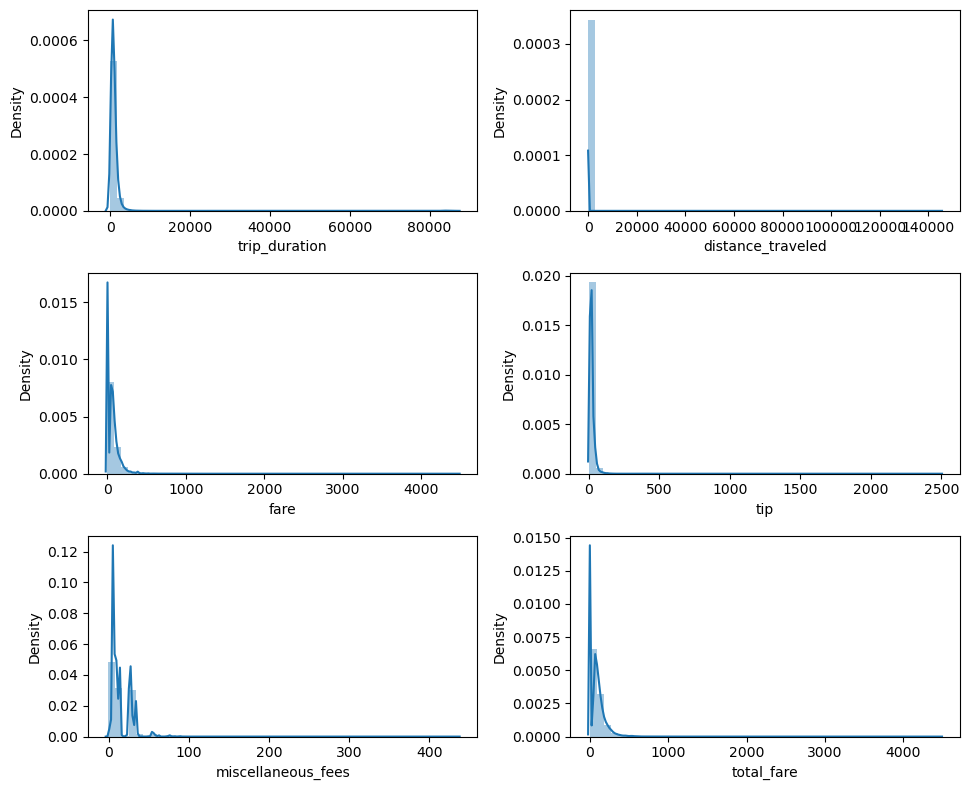

In [17]:
#num_vars - distplot

plt.figure(figsize=(10,8))
nrows=3 #Number of rows for the plot area
ncols=2 #Number of cols for the plot area
iterator=1 #to initiate the plots using loop. Default counter is 1.

for i in num_vars:
    plt.subplot(nrows,ncols,iterator)
    sns.distplot(combined.loc[:,i])
    iterator+=1

plt.tight_layout()
plt.show()

Inferences:
* Since the numerical variables comprise of fare and additional charges along with tip, the data is naturally bound to be Positively Skewed.

* Also, distance travelled can be min 0, but can't be negative and thus we see that there is a positively skewed pattern in the data.

What exactly it means
It simply means, a lot of people are paying higher prices for the distance they travel.

Note: Time in seconds show 0, which is not possible. Therefore we need to fix this pattern too.

In [18]:
#Statistical summary of the data:
train.describe()

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
count,209673.000000,209673.000000,209673.000000,209673.000000,209673.000000,209673.000000,209673.000000,209673.000000
mean,1173.181478,5.054431,1.292808,99.623431,13.030824,15.136829,127.791084,0.280523
std,4775.653621,125.217419,0.930754,85.602702,20.367764,12.553436,98.797374,0.449256
min,0.000000,0.020000,0.000000,0.000000,0.000000,-0.500000,0.000000,0.000000
25%,446.000000,1.950000,1.000000,52.500000,0.000000,6.000000,70.200000,0.000000
50%,707.000000,3.200000,1.000000,75.000000,9.000000,9.750000,101.700000,0.000000
75%,1098.000000,5.730000,1.000000,116.250000,20.000000,26.450000,152.250000,1.000000
max,86387.000000,57283.910000,9.000000,4466.250000,2500.000000,435.000000,4472.250000,1.000000


We also notice that trip_duration, num_of_passengers and fare is 0. We need to analyse them separately.

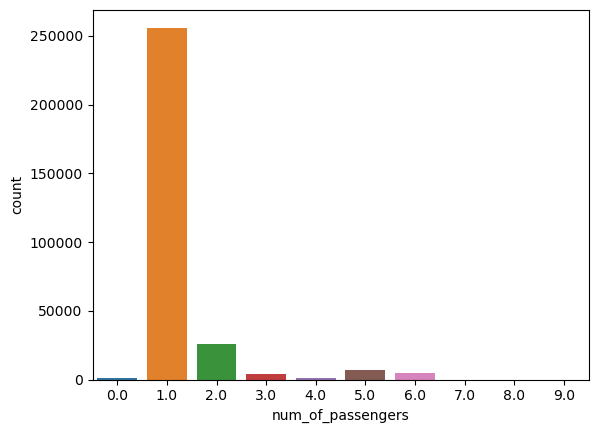

In [19]:
#cat_vars - countplot
sns.countplot(combined.num_of_passengers)
plt.show()

In [21]:
#What about fare where num_of_passengers=0
train.loc[train.num_of_passengers==0,'fare']

14         37.50
380        60.00
426       123.75
459        60.00
1523       52.50
           ...  
208592    108.75
208679     33.75
208707      0.00
208909     67.50
209017     97.50
Name: fare, Length: 753, dtype: float64

In [22]:
train.loc[(train.num_of_passengers==0) & (train.fare==0)]

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
17190,56.0,1.29,0.0,0.0,0,0.00,0.00,0
36846,1600.0,4.18,0.0,0.0,0,0.00,0.00,0
75581,45.0,0.16,0.0,0.0,0,0.00,0.00,0
89187,1679.0,9.98,0.0,0.0,0,3.75,3.75,0
126357,86.0,1.45,0.0,0.0,0,0.00,0.00,0
157026,1386.0,6.92,0.0,0.0,0,0.00,0.00,0
169598,78.0,0.64,0.0,0.0,0,0.00,0.00,0
170282,87.0,11.10,0.0,0.0,0,0.00,0.00,0
208707,2443.0,6.92,0.0,0.0,0,0.00,0.00,0


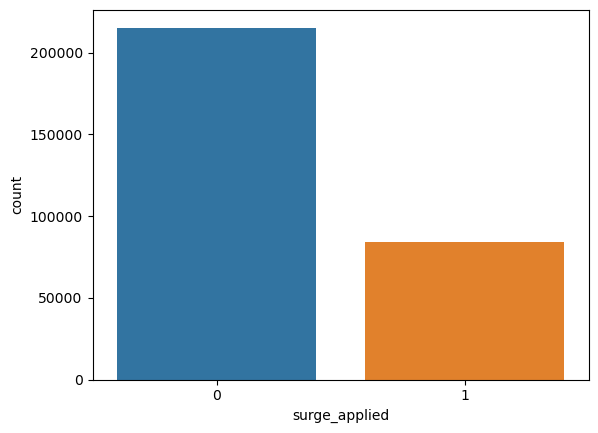

In [20]:
sns.countplot(combined.surge_applied)
plt.show()

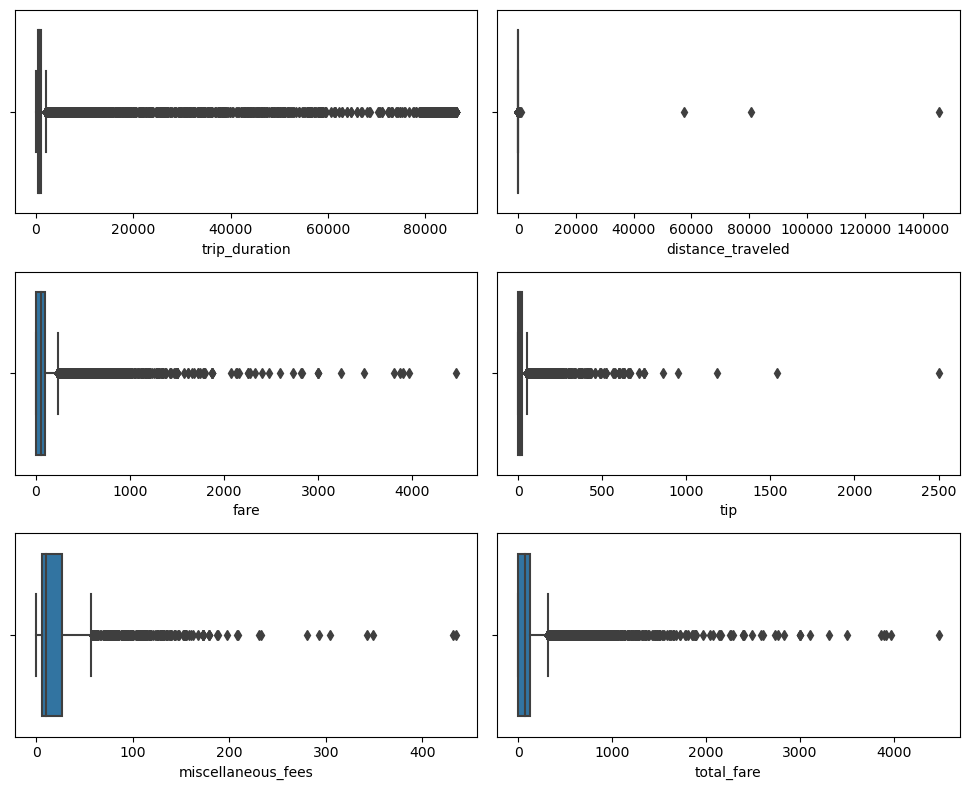

In [23]:
# Check outlier in data

nrows = 3
ncols = 2
iterator = 1
plt.figure(figsize=(10,8))
for i in num_vars:
    plt.subplot(nrows,ncols,iterator)
    sns.boxplot(combined.loc[:,i])
    iterator = iterator+1
    
plt.tight_layout()
plt.show()


##### Bivariate Analysis

* Num vs Num - Scatterplot
* Cat vs num - Box/Voilinplot

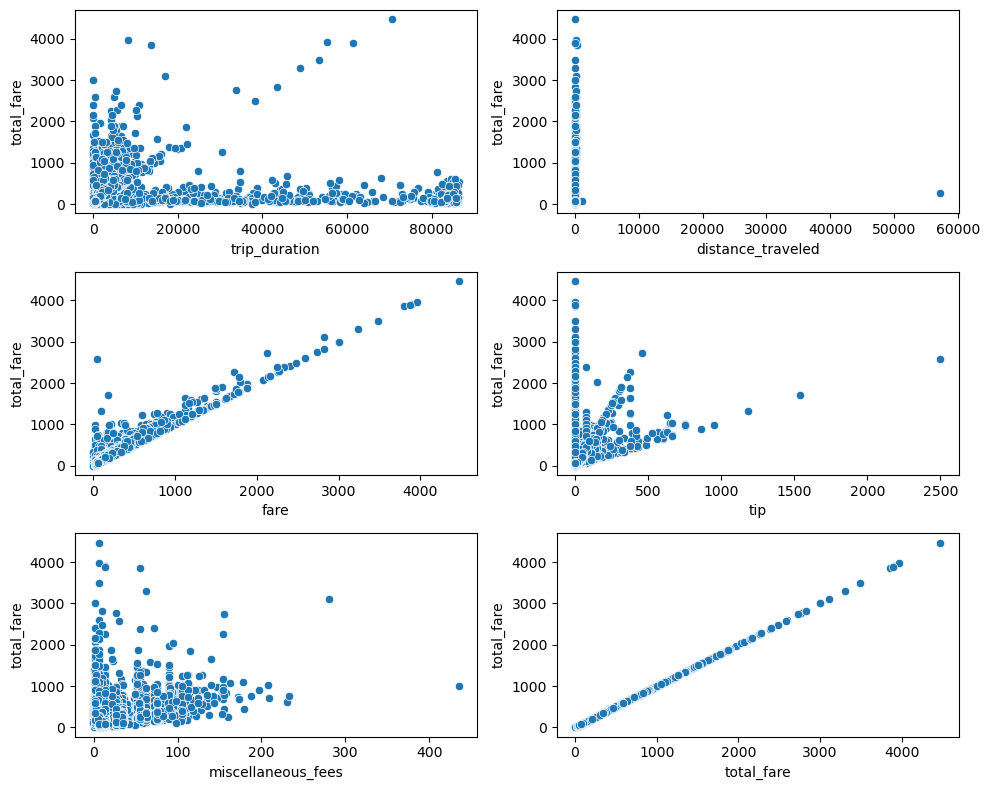

In [24]:
# Num vs num

nrows = 3
ncols = 2
iterator = 1
plt.figure(figsize=(10,8))
for i in num_vars:
    plt.subplot(nrows,ncols,iterator)
    sns.scatterplot(combined.loc[:,i],train.total_fare)
    iterator = iterator+1
    
plt.tight_layout()
plt.show()


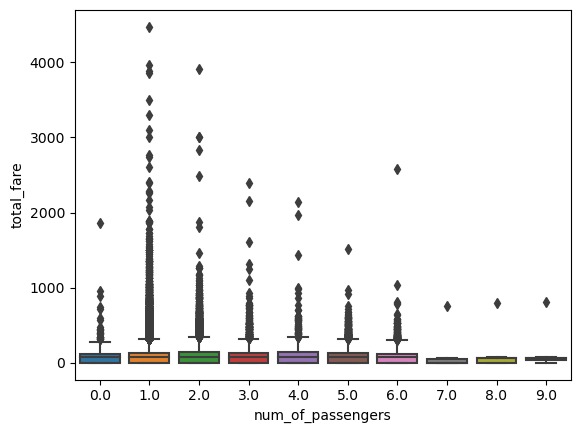

In [27]:
# Boxplot 
#num_of_passengers vs total_fare
sns.boxplot(x='num_of_passengers',y='total_fare',data=combined)
plt.show()

In [72]:
#Lets bin the num_of_passengers basis the total_fare:
def passengers(x):
    if x<=4:
        return('Cab')
    elif x<=6:
        return('SUV')
    else:
        return('Tempo_Traveller')

In [73]:
train['passenger_cat']=train.num_of_passengers.apply(passengers)
test['passenger_cat']=test.num_of_passengers.apply(passengers)

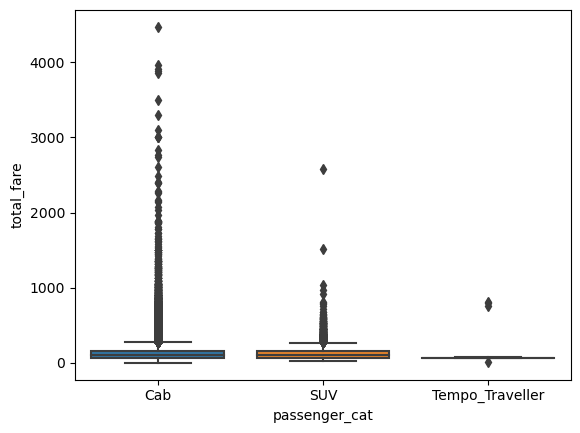

In [80]:
sns.boxplot(x='passenger_cat',y='total_fare',data=train)
plt.show()

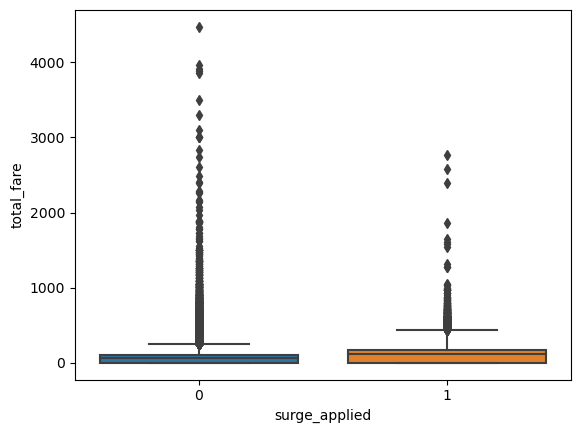

In [28]:
#surge_applied vs total_fare
sns.boxplot(x='surge_applied',y='total_fare',data=combined)
plt.show()

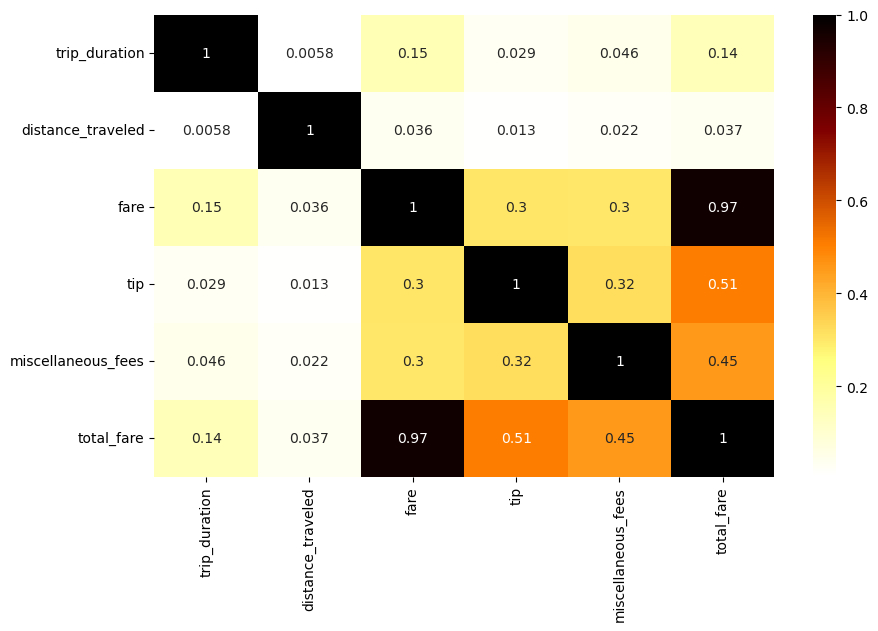

In [29]:
#Correlation:
plt.figure(figsize=(10,6))
sns.heatmap(train.loc[:,num_vars].corr(),annot=True,cmap='afmhot_r')
plt.show()

**Inference of Correlation Heatmap:**
* We notice that there is no strong correlation between the predictors and the target
* Fare has very weak correlation with distance travelled and trip duration

In [30]:
#Missing values:
combined.isnull().sum()

trip_duration         0
distance_traveled     0
num_of_passengers     0
fare                  0
tip                   0
miscellaneous_fees    0
total_fare            0
surge_applied         0
dtype: int64

##### Outlier Removal:
* Boxplot IQR technique and check for correlation

* Winsorization & Check the Correlation

**Note: Boxplot technique only on Train Dataset, wherein the Winsorization can be applied on Train & Test**

In [81]:
#1. Boxplot Technique:
q1=train.quantile(0.25)
q3=train.quantile(0.75)
IQR=q3-q1

upper=q3+1.5*IQR
lower=q1-1.5*IQR

In [82]:
#Remove outliers from data:
wt_outliers=train.loc[~((train<lower)|(train>upper)).any(axis=1)]
wt_outliers.shape

(158838, 9)

In [83]:
train.shape[0]-wt_outliers.shape[0]
#Machine Learns pattern from the training set.

50835

In [40]:
test.shape
#Machine will test its learning on the test set

(89861, 8)

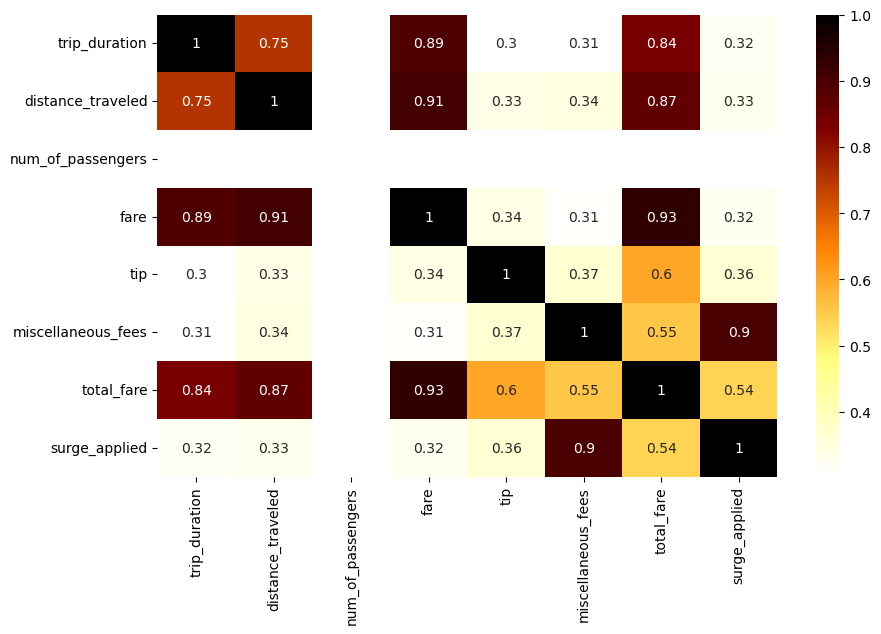

In [84]:
#Correlation for the new data (wt_outliers)
plt.figure(figsize=(10,6))
sns.heatmap(wt_outliers.loc[:,].corr(),annot=True,cmap='afmhot_r')
plt.show()

**New Lesson:
If the data has lots of outliers and the correlation is very weak with the target. One must remove the Outliers because it might improve the Correlation with the target massively.**

##### Winsorization:
* It is a concept where we cap the value. Capping means the outliers will capped/maxed at, say, 0.95. Pass data to cut in limits.
* It looks like trimming from top & bottom selectively

In [42]:
#Apply Winsorization:
from scipy.stats.mstats import winsorize
#input: array, limit percent for cutting the data

In [63]:
new=combined.copy()

In [64]:
for i in new.columns:
    winsorized_data=winsorize(a=new.loc[:,i],limits=(0.01,0.01))
    new[i+'_winsorized']=winsorized_data

In [65]:
new.head()

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied,trip_duration_winsorized,distance_traveled_winsorized,num_of_passengers_winsorized,fare_winsorized,tip_winsorized,miscellaneous_fees_winsorized,total_fare_winsorized,surge_applied_winsorized
0,748.0,2.75,1.0,75.00,24,6.300,105.300,0,748.0,2.75,1.0,75.00,24,6.300,105.300,0
1,1187.0,3.43,1.0,105.00,24,13.200,142.200,0,1187.0,3.43,1.0,105.00,24,13.200,142.200,0
2,730.0,3.12,1.0,71.25,0,26.625,97.875,1,730.0,3.12,1.0,71.25,0,26.625,97.875,1
3,671.0,5.63,3.0,90.00,0,9.750,99.750,0,671.0,5.63,3.0,90.00,0,9.750,99.750,0
4,329.0,2.09,1.0,45.00,12,13.200,70.200,0,329.0,2.09,1.0,45.00,12,13.200,70.200,0


In [66]:
win_num_cols=['trip_duration_winsorized', 'distance_traveled_winsorized', 'fare_winsorized',
       'tip_winsorized', 'miscellaneous_fees_winsorized', 'total_fare_winsorized']

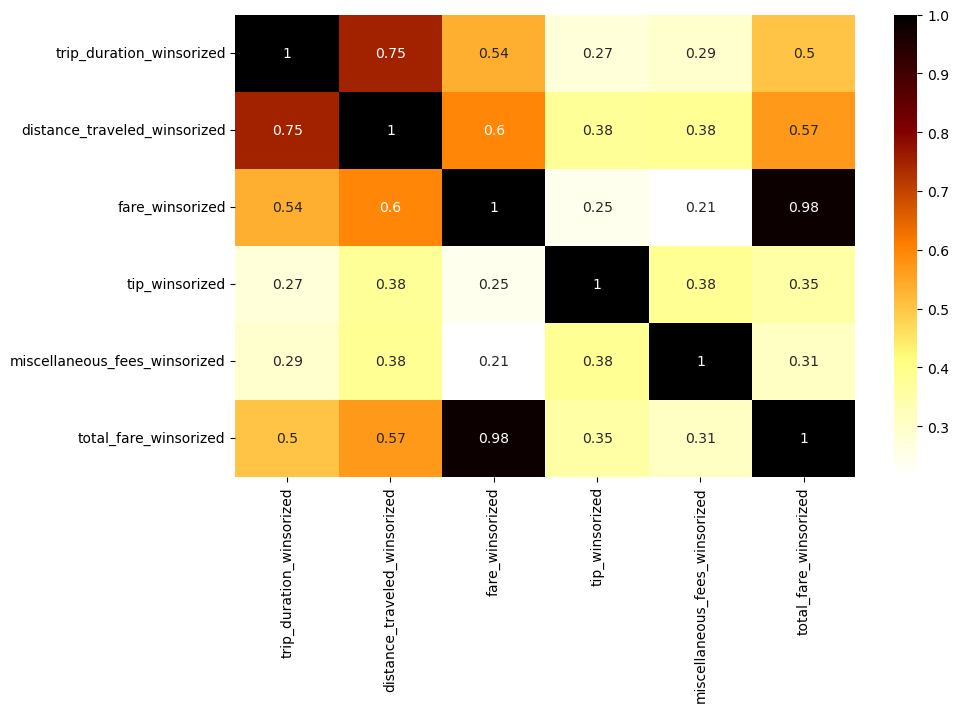

In [67]:
plt.figure(figsize=(10,6))
sns.heatmap(new.loc[:,win_num_cols].corr(),annot=True,cmap='afmhot_r')
plt.show()

#### SUMMARY: IQR vs Winsorization
* We can clearly see that the IQR method wins hands down because although we lost some percentage of data in IQR approach, however, correlation has massively improved.

* On the other hand, by limiting the data to 99% in winsorization technique, we see that the correlation has improved decently.

Therefore, we will be using `wt_outliers` data instead of **new** dataset created.

##### Feature Engineering:

In [85]:
wt_outliers.head()

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied,passenger_cat
0,748.0,2.75,1.0,75.00,24,6.300,105.300,0,Cab
1,1187.0,3.43,1.0,105.00,24,13.200,142.200,0,Cab
2,730.0,3.12,1.0,71.25,0,26.625,97.875,1,Cab
4,329.0,2.09,1.0,45.00,12,13.200,70.200,0,Cab
5,355.0,1.74,1.0,45.00,0,26.625,71.625,1,Cab


In [86]:
#Trip Duration/3600 - hours
#Tip - where the tip is 0, we create a dummy variable - Tip & No Tip

wt_outliers['trip_hours']=wt_outliers['trip_duration']/3600
test['trip_hours']=test['trip_duration']/3600

In [87]:
new.num_of_passengers_winsorized.unique()

array([1., 3., 2., 6., 5., 4.])

In [88]:
wt_outliers.passenger_cat.unique()

array(['Cab'], dtype=object)

In [89]:
#Drop num_of_passengers & passenger_cat from wt_outliers & test set.
wt_outliers.drop(['num_of_passengers','passenger_cat'],axis=1,inplace=True)
test.drop(['num_of_passengers','passenger_cat'],axis=1,inplace=True)

In [90]:
wt_outliers.shape

(158838, 8)

In [91]:
wt_outliers.head()

,trip_duration,distance_traveled,fare,tip,miscellaneous_fees,total_fare,surge_applied,trip_hours
0,748.0,2.75,75.00,24,6.300,105.300,0,0.207778
1,1187.0,3.43,105.00,24,13.200,142.200,0,0.329722
2,730.0,3.12,71.25,0,26.625,97.875,1,0.202778
4,329.0,2.09,45.00,12,13.200,70.200,0,0.091389
5,355.0,1.74,45.00,0,26.625,71.625,1,0.098611


In [92]:
def tipping(x):
    if x==0:
        return('No_Tip')
    else:
        return('Tip')

In [93]:
wt_outliers['tip_cat']=wt_outliers.tip.apply(tipping)
test['tip_cat']=test.tip.apply(tipping)

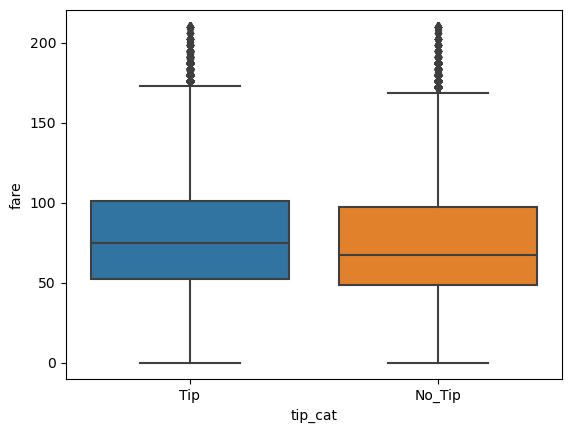

In [94]:
sns.boxplot(x='tip_cat',y='fare',data=wt_outliers)
plt.show()

In [95]:
wt_outliers.groupby('tip_cat')['fare'].describe()

,count,mean,std,min,25%,50%,75%,max
tip_cat,,,,,,,,
No_Tip,69949.0,75.781087,36.554899,0.0,48.75,67.5,97.50,210.0
Tip,88889.0,80.557617,34.939973,0.0,52.50,75.0,101.25,210.0


In [97]:
#median of tip & misc fee:
wt_outliers['travel_cost']=wt_outliers.loc[:,['tip','miscellaneous_fees']].median(axis=1)

In [98]:
#Travel cost & distance travelled median:
wt_outliers['dist_travel_cost']=wt_outliers.loc[:,['travel_cost','distance_traveled']].median(axis=1)

In [101]:
#distance_travelled * trip_hours
wt_outliers['magic1']=wt_outliers['distance_traveled']*wt_outliers['trip_hours']

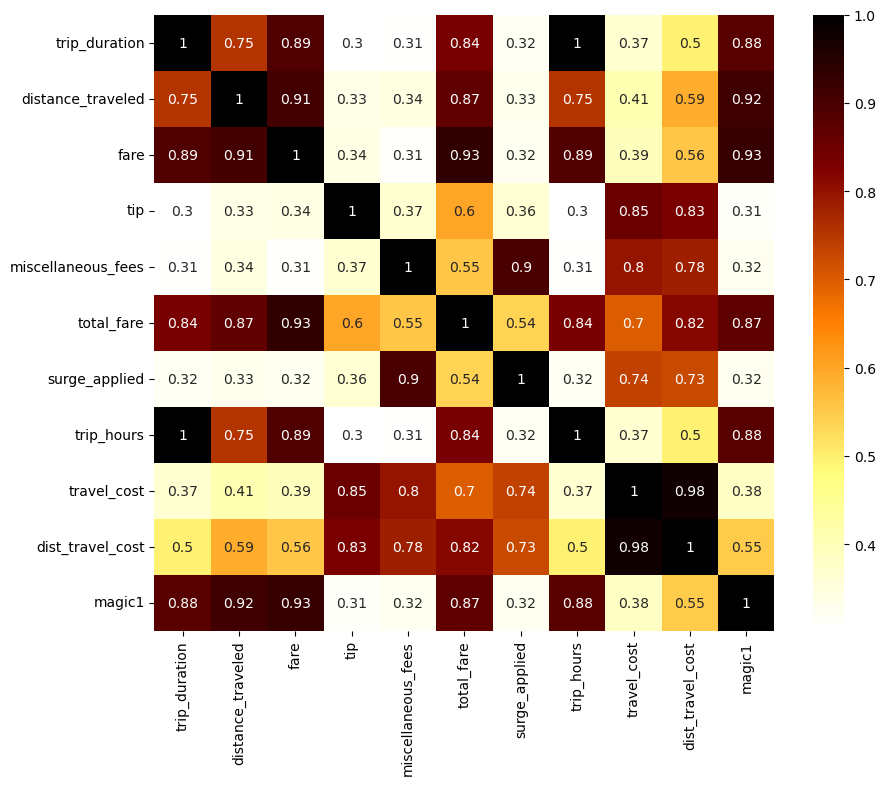

In [102]:
plt.figure(figsize=(10,8))
sns.heatmap(wt_outliers.corr(),annot=True,cmap='afmhot_r')
plt.show()

In [103]:
#median of tip & misc fee:
test['travel_cost']=test.loc[:,['tip','miscellaneous_fees']].median(axis=1)

#Travel cost & distance travelled median:
test['dist_travel_cost']=test.loc[:,['travel_cost','distance_traveled']].median(axis=1)

#distance_travelled * trip_hours
test['magic1']=test['distance_traveled']*test['trip_hours']

In [104]:
wt_outliers.distance_traveled.describe()

count    158838.000000
mean          3.510818
std           2.315952
min           0.020000
25%           1.830000
50%           2.900000
75%           4.600000
max          11.390000
Name: distance_traveled, dtype: float64

In [105]:
def distance(x):
    if x<=2.5:
        return('Vicinity')
    elif x<=5:
        return('Close')
    elif x<=7.5:
        return('Far')
    elif x<=10:
        return('Distant')
    else:
        return('Remote')

In [106]:
wt_outliers['distance_cat']=wt_outliers.distance_traveled.apply(distance)

In [107]:
test['distance_cat']=test.distance_traveled.apply(distance)

In [108]:
wt_outliers.head()

,trip_duration,distance_traveled,fare,tip,miscellaneous_fees,total_fare,surge_applied,trip_hours,tip_cat,travel_cost,dist_travel_cost,magic1,distance_cat
0,748.0,2.75,75.00,24,6.300,105.300,0,0.207778,Tip,15.1500,8.95000,0.571389,Close
1,1187.0,3.43,105.00,24,13.200,142.200,0,0.329722,Tip,18.6000,11.01500,1.130947,Close
2,730.0,3.12,71.25,0,26.625,97.875,1,0.202778,No_Tip,13.3125,8.21625,0.632667,Close
4,329.0,2.09,45.00,12,13.200,70.200,0,0.091389,Tip,12.6000,7.34500,0.191003,Vicinity
5,355.0,1.74,45.00,0,26.625,71.625,1,0.098611,No_Tip,13.3125,7.52625,0.171583,Vicinity


In [109]:
test.head()

,trip_duration,distance_traveled,fare,tip,miscellaneous_fees,total_fare,surge_applied,trip_hours,tip_cat,travel_cost,dist_travel_cost,magic1,distance_cat
0,1076.0,4.18,0,0,13.500,0,0,0.298889,No_Tip,6.7500,5.46500,1.249356,Close
1,429.0,1.48,0,0,13.500,0,0,0.119167,No_Tip,6.7500,4.11500,0.176367,Vicinity
2,856.0,4.15,0,24,6.000,0,0,0.237778,Tip,15.0000,9.57500,0.986778,Close
3,622.0,3.22,0,15,5.625,0,0,0.172778,Tip,10.3125,6.76625,0.556344,Close
4,507.0,3.98,0,0,2.250,0,0,0.140833,No_Tip,1.1250,2.55250,0.560517,Close


##### Hypothesis Testing:

In [110]:
wt_outliers.select_dtypes(include='number').columns

Index(['trip_duration', 'distance_traveled', 'fare', 'tip',
       'miscellaneous_fees', 'total_fare', 'surge_applied', 'trip_hours',
       'travel_cost', 'dist_travel_cost', 'magic1'],
      dtype='object')

In [111]:
num_vars=['trip_duration', 'distance_traveled', 'tip',
       'miscellaneous_fees', 'total_fare', 'trip_hours',
       'travel_cost', 'dist_travel_cost', 'magic1']

#Ho: That predictor(s) var & target var is independent of each other
#This means one does not affect the other. The predictor(s) do not contribute in predicting the target variable.

#Ha: Ho is false. The predictor is a significant feature for the target

In [112]:
import scipy.stats as stats

In [115]:
for i in num_vars:
    teststats, pvalue=stats.ttest_ind(wt_outliers.loc[:,i],wt_outliers.fare)
    print('pvalue for ',i,'Var is:',np.round(pvalue,4))

pvalue for  trip_duration Var is: 0.0
pvalue for  distance_traveled Var is: 0.0
pvalue for  tip Var is: 0.0
pvalue for  miscellaneous_fees Var is: 0.0
pvalue for  total_fare Var is: 0.0
pvalue for  trip_hours Var is: 0.0
pvalue for  travel_cost Var is: 0.0
pvalue for  dist_travel_cost Var is: 0.0
pvalue for  magic1 Var is: 0.0


#Since pvalue for all predictors is 0, which is less than alpha(0.05). We can say that the features are significant.

In [116]:
#Surge_applied, tip:
wt_outliers.tip_cat.unique()

array(['Tip', 'No_Tip'], dtype=object)

In [117]:
#where the tip==y, fare and tip==n, fare
yes=wt_outliers.loc[wt_outliers.tip_cat=='Tip','fare']
no=wt_outliers.loc[wt_outliers.tip_cat=='No_Tip','fare']

In [119]:
#Ho: That tip_cat has no relation with fare
#Ha: tip_cat has a relation with fare
stats.ttest_ind(yes,no)

Ttest_indResult(statistic=26.501271631925103, pvalue=2.0365892640545085e-154)

#Conclusion: Since pvalue<0.05, reject Ho, tip_cat is a significant feature

In [120]:
wt_outliers.surge_applied.unique()

array([0, 1], dtype=int64)

In [121]:
yes=wt_outliers.loc[wt_outliers.surge_applied==1,'fare']
no=wt_outliers.loc[wt_outliers.surge_applied==0,'fare']

In [122]:
#Ho: That surge_applied has no relation with fare
#Ha: surge_applied has a relation with fare
stats.ttest_ind(yes,no)

Ttest_indResult(statistic=135.18360882389516, pvalue=0.0)

#Conclusion: Since pvalue<0.05, reject Ho, surge_applied is a significant feature

In [123]:
#distance_cat:
wt_outliers.distance_cat.unique()

array(['Close', 'Vicinity', 'Far', 'Distant', 'Remote'], dtype=object)

In [127]:
import statsmodels.formula.api as sfa

In [128]:
model=sfa.ols('fare~distance_cat',data=wt_outliers).fit()

In [124]:
#Anova:
from statsmodels.stats.anova import anova_lm

In [129]:
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
distance_cat,4.0,1.558616e+08,3.896541e+07,131639.152329,0.0
Residual,158833.0,4.701484e+07,2.960017e+02,NaN,NaN


#Since pvalue<alpha, we reject Ho. distance_cat is a significant feature for the target.

##### OneHot Encoding - Categorical Vars

In [130]:
#Converting cat vars to numbers:
dummytrain=pd.get_dummies(wt_outliers, drop_first=True)
dummytest=pd.get_dummies(test, drop_first=True)

In [131]:
dummytest.head()

,trip_duration,distance_traveled,fare,tip,miscellaneous_fees,total_fare,surge_applied,trip_hours,travel_cost,dist_travel_cost,magic1,tip_cat_Tip,distance_cat_Distant,distance_cat_Far,distance_cat_Remote,distance_cat_Vicinity
0,1076.0,4.18,0,0,13.500,0,0,0.298889,6.7500,5.46500,1.249356,0,0,0,0,0
1,429.0,1.48,0,0,13.500,0,0,0.119167,6.7500,4.11500,0.176367,0,0,0,0,1
2,856.0,4.15,0,24,6.000,0,0,0.237778,15.0000,9.57500,0.986778,1,0,0,0,0
3,622.0,3.22,0,15,5.625,0,0,0.172778,10.3125,6.76625,0.556344,1,0,0,0,0
4,507.0,3.98,0,0,2.250,0,0,0.140833,1.1250,2.55250,0.560517,0,0,0,0,0


In [132]:
#X and y:
X=dummytrain.drop(['fare','total_fare','trip_duration'],axis=1)
y=dummytrain.fare

dummytest.drop(['fare','total_fare','trip_duration'],axis=1,inplace=True)

In [134]:
X.head()

,distance_traveled,tip,miscellaneous_fees,surge_applied,trip_hours,travel_cost,dist_travel_cost,magic1,tip_cat_Tip,distance_cat_Distant,distance_cat_Far,distance_cat_Remote,distance_cat_Vicinity
0,2.75,24,6.300,0,0.207778,15.1500,8.95000,0.571389,1,0,0,0,0
1,3.43,24,13.200,0,0.329722,18.6000,11.01500,1.130947,1,0,0,0,0
2,3.12,0,26.625,1,0.202778,13.3125,8.21625,0.632667,0,0,0,0,0
4,2.09,12,13.200,0,0.091389,12.6000,7.34500,0.191003,1,0,0,0,1
5,1.74,0,26.625,1,0.098611,13.3125,7.52625,0.171583,0,0,0,0,1


In [135]:
y.head()

0     75.00
1    105.00
2     71.25
4     45.00
5     45.00
Name: fare, dtype: float64

In [136]:
dummytest.head()

,distance_traveled,tip,miscellaneous_fees,surge_applied,trip_hours,travel_cost,dist_travel_cost,magic1,tip_cat_Tip,distance_cat_Distant,distance_cat_Far,distance_cat_Remote,distance_cat_Vicinity
0,4.18,0,13.500,0,0.298889,6.7500,5.46500,1.249356,0,0,0,0,0
1,1.48,0,13.500,0,0.119167,6.7500,4.11500,0.176367,0,0,0,0,1
2,4.15,24,6.000,0,0.237778,15.0000,9.57500,0.986778,1,0,0,0,0
3,3.22,15,5.625,0,0.172778,10.3125,6.76625,0.556344,1,0,0,0,0
4,3.98,0,2.250,0,0.140833,1.1250,2.55250,0.560517,0,0,0,0,0


### Model Building:

* Base Model - Avg
* Linear Regression Model
* Random Forest Model
* Gradient Boosting
* XGBoost

In [137]:
#Linear Regression:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold

kfold=KFold(n_splits=5,shuffle=True, random_state=42)
lr=LinearRegression()

In [139]:
# 5 CV Linear Regression Model:

pred=[]      #All the prediction values will be stored here.

for train_index,test_index in kfold.split(X,y):  #splitting data in 5 folds
    Xtrain=X.iloc[train_index]
    ytrain=y.iloc[train_index]     #Do direct prediction on the dummytest
    pred.append(lr.fit(Xtrain,ytrain).predict(dummytest))

In [140]:
pd.DataFrame(pred).T

,0,1,2,3,4
0,96.303474,96.356569,96.462195,96.272148,96.426399
1,48.601205,48.565222,48.630120,48.610164,48.556878
2,90.330724,90.393830,90.310016,90.398952,90.313500
3,72.200474,72.208441,72.120225,72.214153,72.129668
4,73.943670,73.986248,73.809226,73.942736,73.918071
...,...,...,...,...,...
89856,53.144918,53.150150,53.222335,53.144363,53.171380
89857,59.487083,59.456746,59.502513,59.461263,59.432625
89858,55.476760,55.465689,55.481356,55.450815,55.522042
89859,90.446207,90.505555,90.538564,90.516935,90.504634


In [141]:
pd.DataFrame(pred).T.mean(axis=1)

0        96.364157
1        48.592718
2        90.349404
3        72.174592
4        73.919990
           ...    
89856    53.166629
89857    59.468046
89858    55.479332
89859    90.502379
89860    67.942758
Length: 89861, dtype: float64

In [142]:
test['fare']=np.abs(pd.DataFrame(pred).T.mean(axis=1))

In [143]:
test.head()

,trip_duration,distance_traveled,fare,tip,miscellaneous_fees,total_fare,surge_applied,trip_hours,tip_cat,travel_cost,dist_travel_cost,magic1,distance_cat
0,1076.0,4.18,96.364157,0,13.500,0,0,0.298889,No_Tip,6.7500,5.46500,1.249356,Close
1,429.0,1.48,48.592718,0,13.500,0,0,0.119167,No_Tip,6.7500,4.11500,0.176367,Vicinity
2,856.0,4.15,90.349404,24,6.000,0,0,0.237778,Tip,15.0000,9.57500,0.986778,Close
3,622.0,3.22,72.174592,15,5.625,0,0,0.172778,Tip,10.3125,6.76625,0.556344,Close
4,507.0,3.98,73.919990,0,2.250,0,0,0.140833,No_Tip,1.1250,2.55250,0.560517,Close


In [144]:
#Final var:
total_fare=test['fare']+test['tip']+test['miscellaneous_fees']

#Submission file:
submission=pd.DataFrame({'total_fare':total_fare})

In [148]:
#Export it outside:
submission.to_csv('LRModel.csv',index=False)
#RMSLE: 0.29

In [149]:
#Random Forest Model:

from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
rf=RandomForestRegressor()

pred_rf=[]
for train_index,test_index in kfold.split(X,y):  #splitting data in 5 folds
    Xtrain=X.iloc[train_index]
    ytrain=y.iloc[train_index]     #Do direct prediction on the dummytest
    pred_rf.append(rf.fit(Xtrain,ytrain).predict(dummytest))


In [150]:
#GB Model:

gbm=GradientBoostingRegressor()

pred_gbm=[]
for train_index,test_index in kfold.split(X,y):  #splitting data in 5 folds
    Xtrain=X.iloc[train_index]
    ytrain=y.iloc[train_index]     #Do direct prediction on the dummytest
    pred_gbm.append(gbm.fit(Xtrain,ytrain).predict(dummytest))


In [151]:
from xgboost import XGBRegressor
xgb=XGBRegressor()

pred_xgb=[]
for train_index,test_index in kfold.split(X,y):  #splitting data in 5 folds
    Xtrain=X.iloc[train_index]
    ytrain=y.iloc[train_index]     #Do direct prediction on the dummytest
    pred_xgb.append(xgb.fit(Xtrain,ytrain).predict(dummytest))

In [153]:
#!pip install lightgbm

     ---------------------------------------- 1.0/1.0 MB 6.5 MB/s eta 0:00:00


In [154]:
from lightgbm import LGBMRegressor
lgbm=LGBMRegressor()

pred_lgbm=[]
for train_index,test_index in kfold.split(X,y):  #splitting data in 5 folds
    Xtrain=X.iloc[train_index]
    ytrain=y.iloc[train_index]     #Do direct prediction on the dummytest
    pred_lgbm.append(lgbm.fit(Xtrain,ytrain).predict(dummytest))

In [158]:
#Submission of RF model:
test['fare']=np.abs(pd.DataFrame(pred_rf).T.mean(axis=1))
#Final var:
total_fare=test['fare']+test['tip']+test['miscellaneous_fees']

#Submission file:
submission=pd.DataFrame({'total_fare':total_fare})

In [159]:
#Export it outside:
submission.to_csv('RFModel.csv',index=False)
#RMSLE: 0.185

In [161]:
#Submission of GB model:
test['fare']=np.abs(pd.DataFrame(pred_gbm).T.mean(axis=1))
#Final var:
total_fare=test['fare']+test['tip']+test['miscellaneous_fees']

#Submission file:
submission=pd.DataFrame({'total_fare':total_fare})

In [162]:
#Export it outside:
submission.to_csv('GBModel.csv',index=False)
#RMSLE: 0.189

In [163]:
#Submission of XGB model:
test['fare']=np.abs(pd.DataFrame(pred_xgb).T.mean(axis=1))
#Final var:
total_fare=test['fare']+test['tip']+test['miscellaneous_fees']

#Submission file:
submission=pd.DataFrame({'total_fare':total_fare})

In [164]:
#Export it outside:
submission.to_csv('XGBModel.csv',index=False)
#RMSLE: 0.184

In [165]:
#Submission of LGB model:
test['fare']=np.abs(pd.DataFrame(pred_lgbm).T.mean(axis=1))
#Final var:
total_fare=test['fare']+test['tip']+test['miscellaneous_fees']

#Submission file:
submission=pd.DataFrame({'total_fare':total_fare})

In [166]:
#Export it outside:
submission.to_csv('LGBModel.csv',index=False)
#RMSLE: 0.187

### Tuning Parameters of XGB:

In [167]:
from sklearn.model_selection import GridSearchCV

xgb=XGBRegressor()

params={'learning_rate':[0.1,0.01,0.001,0.5],
       'max_depth':[3,5,7,8],
       'n_estimators':[100,300,500],
       'subsample':[0.6,0.8,1]}

grid=GridSearchCV(estimator=xgb,
                 param_grid=params,
                 cv=5,
                 scoring='neg_mean_squared_log_error')

In [168]:
#Fit the grid search on the data:
grid.fit(X,y)
print('Best Parameters:',grid.best_params_)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.6}
